In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
# !pip install indic-nlp-library

In [94]:
import pandas as pd
import re
from indicnlp.tokenize import indic_tokenize

file_name = '/content/drive/MyDrive/Datasets_HateSpeech/Tamil/Tamil.csv'
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_name, encoding='utf-8')
df.head()

,Post,Labels Set,Dataset
0,அருமை படைப்புகள் நன்றி சகோ,Non-Hate-Speech,tamil_dataset
1,3 : 49 உனக்கு gay புள்ள பொறந்தா என்னடா பண்ணுவ....,Non-Hate-Speech,tamil_dataset
2,Nishanthini Krishnamoorthy மன்னிப்பு தமிழ்ல ...,Non-Hate-Speech,tamil_dataset
3,செமையா சகோ,Non-Hate-Speech,tamil_dataset
4,இறைவனின் மறுபிறவி மனித மிருகங்களால் எந்த தொல்ல...,Non-Hate-Speech,tamil_dataset


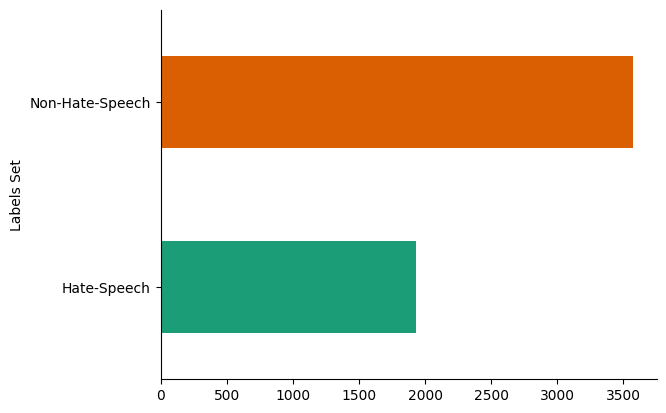

In [95]:
# @title Labels Set

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Labels Set').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [96]:
# Check for duplicates
duplicate_rows = df[df.duplicated()]
if not duplicate_rows.empty:
    print("Duplicate rows found. Removing duplicates...")
    df.drop_duplicates(inplace=True)

# Check for NaN values
nan_rows = df[df.isna().any(axis=1)]
if not nan_rows.empty:
    print("Rows with NaN values found. Removing...")
    df.dropna(inplace=True)

# Print length of the dataset after removing duplicates and NaN values
print("Length of the dataset after cleaning: ", len(df))

Length of the dataset after cleaning:  5503


In [97]:
import re

def remove_emojis(text):
    # Define a regular expression pattern to match emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)

    # Remove emojis from the text using the pattern
    return emoji_pattern.sub(r'', text)

In [98]:
def preprocess_tamil_text(text):
    # Remove mentions, email addresses, URLs, RT (retweet)
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # Remove mentions
    text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', '', text)  # Remove email addresses
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'RT\s*@\S+', '', text)  # Remove retweets
    # Remove HTML tags (if any)
    text = re.sub(r'<.*?>', '', text)
    # Remove English words and non-Tamil characters
    # text = re.sub(r'[A-Za-z]', '', text)
    # Remove Tamil punctuation marks
    #text = re.sub(r'[\u002C\u0964\u0BB7\u0BCD]', '', text)
    # Remove special characters and accented characters
    # text = re.sub(r'[^\u0B80-\u0BFF\s]', '', text)
    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text)
    # Strip leading/trailing whitespaces
    text = text.strip()
    return text

# Preprocess the 'Post' column
df['Processed_Post'] = df['Post'].apply(preprocess_tamil_text)
df['Processed_Post'] = df['Processed_Post'].apply(remove_emojis)

In [99]:
df

,Post,Labels Set,Dataset,Processed_Post
0,அருமை படைப்புகள் நன்றி சகோ,Non-Hate-Speech,tamil_dataset,அருமை படைப்புகள் நன்றி சகோ
1,3 : 49 உனக்கு gay புள்ள பொறந்தா என்னடா பண்ணுவ....,Non-Hate-Speech,tamil_dataset,3 : 49 உனக்கு gay புள்ள பொறந்தா என்னடா பண்ணுவ....
2,Nishanthini Krishnamoorthy மன்னிப்பு தமிழ்ல ...,Non-Hate-Speech,tamil_dataset,Nishanthini Krishnamoorthy மன்னிப்பு தமிழ்ல என...
3,செமையா சகோ,Non-Hate-Speech,tamil_dataset,செமையா சகோ
4,இறைவனின் மறுபிறவி மனித மிருகங்களால் எந்த தொல்ல...,Non-Hate-Speech,tamil_dataset,இறைவனின் மறுபிறவி மனித மிருகங்களால் எந்த தொல்ல...
...,...,...,...,...
5498,முட்டல் அவன் சொல்ல வந்தது வெற நீங்கள் புரிந்து...,Non-Hate-Speech,tamil_dataset,முட்டல் அவன் சொல்ல வந்தது வெற நீங்கள் புரிந்து...
5499,அது யாழின் பாரம்பரிய உணவான புட்டை பெருமை படுத்...,Non-Hate-Speech,tamil_dataset,அது யாழின் பாரம்பரிய உணவான புட்டை பெருமை படுத்...
5500,அவர் தன்னுடைய கருத்தை கவிதை மூலமும் பாடல் மூலம...,Non-Hate-Speech,tamil_dataset,அவர் தன்னுடைய கருத்தை கவிதை மூலமும் பாடல் மூலம...
5501,யதார்த்தமான கருத்தை புரியமுடியாவிட்டால் அதை கட...,Non-Hate-Speech,tamil_dataset,யதார்த்தமான கருத்தை புரியமுடியாவிட்டால் அதை கட...


In [100]:
set(df['Labels Set'])

{'Hate-Speech', 'Non-Hate-Speech'}

In [101]:
mapping_dict = {'Hate-Speech': 1, 'Non-Hate-Speech': 0}
df["Labels Set"] = df["Labels Set"].map(mapping_dict)

In [102]:
df

,Post,Labels Set,Dataset,Processed_Post
0,அருமை படைப்புகள் நன்றி சகோ,0,tamil_dataset,அருமை படைப்புகள் நன்றி சகோ
1,3 : 49 உனக்கு gay புள்ள பொறந்தா என்னடா பண்ணுவ....,0,tamil_dataset,3 : 49 உனக்கு gay புள்ள பொறந்தா என்னடா பண்ணுவ....
2,Nishanthini Krishnamoorthy மன்னிப்பு தமிழ்ல ...,0,tamil_dataset,Nishanthini Krishnamoorthy மன்னிப்பு தமிழ்ல என...
3,செமையா சகோ,0,tamil_dataset,செமையா சகோ
4,இறைவனின் மறுபிறவி மனித மிருகங்களால் எந்த தொல்ல...,0,tamil_dataset,இறைவனின் மறுபிறவி மனித மிருகங்களால் எந்த தொல்ல...
...,...,...,...,...
5498,முட்டல் அவன் சொல்ல வந்தது வெற நீங்கள் புரிந்து...,0,tamil_dataset,முட்டல் அவன் சொல்ல வந்தது வெற நீங்கள் புரிந்து...
5499,அது யாழின் பாரம்பரிய உணவான புட்டை பெருமை படுத்...,0,tamil_dataset,அது யாழின் பாரம்பரிய உணவான புட்டை பெருமை படுத்...
5500,அவர் தன்னுடைய கருத்தை கவிதை மூலமும் பாடல் மூலம...,0,tamil_dataset,அவர் தன்னுடைய கருத்தை கவிதை மூலமும் பாடல் மூலம...
5501,யதார்த்தமான கருத்தை புரியமுடியாவிட்டால் அதை கட...,0,tamil_dataset,யதார்த்தமான கருத்தை புரியமுடியாவிட்டால் அதை கட...


In [103]:
#df[df['Labels Set'] == 1] #1930

In [104]:
train_hate_df = df[df["Labels Set"] == 1].copy()
train_non_hate_df = df[df["Labels Set"] == 0].copy()

sampled_hate_df = train_hate_df
sampled_non_hate_df = train_non_hate_df[:3070] #as hate is 1930 to maintain 5000 getting chosen

concatenated_df = pd.concat([sampled_hate_df, sampled_non_hate_df], axis=0)
df_ = concatenated_df.sample(frac=1, random_state=42).reset_index(drop=True)

train_df = df_[:4000]
test_df = df_[-1000:]

In [105]:
train_df[train_df["Labels Set"] == 1]

,Post,Labels Set,Dataset,Processed_Post
0,Eeya kaila marathondi potu ikiran jarava keriyen,1,tamil_dataset,Eeya kaila marathondi potu ikiran jarava keriyen
3,Yaru indha kurengu pommei 😏😏,1,tamil_dataset,Yaru indha kurengu pommei
4,Seruppa adi unaku,1,tamil_dataset,Seruppa adi unaku
5,நீங்கள் திருநங்கையரை குறித்து கேட்கிரீர்கள் சர...,1,tamil_dataset,நீங்கள் திருநங்கையரை குறித்து கேட்கிரீர்கள் சர...
6,மூத்திரம் குடிக்கும் ரெண்டு சங்கிகள் இஞ்சி தின...,1,tamil_dataset,மூத்திரம் குடிக்கும் ரெண்டு சங்கிகள் இஞ்சி தின...
...,...,...,...,...
3989,Poruki tanamana spech,1,tamil_dataset,Poruki tanamana spech
3990,thevdiya paiyan karunanithi,1,tamil_dataset,thevdiya paiyan karunanithi
3993,இவர்கள் இப்படி இருப்பதற்கு ஏதாவது காரணம் இர...,1,tamil_dataset,இவர்கள் இப்படி இருப்பதற்கு ஏதாவது காரணம் இருக்...
3996,சுகாதாரத்துறைக்கு கொடுத்தால் அதுல நியாயம் இருக...,1,tamil_dataset,சுகாதாரத்துறைக்கு கொடுத்தால் அதுல நியாயம் இருக...


In [106]:
test_df

,Post,Labels Set,Dataset,Processed_Post
4000,அடி விளக்கு மாராலே அதுவும் புது விளக்குமாரளை,1,tamil_dataset,அடி விளக்கு மாராலே அதுவும் புது விளக்குமாரளை
4001,Motivating Atma இத்துடன் தலைப்பு செய்திகள் முட...,0,tamil_dataset,Motivating Atma இத்துடன் தலைப்பு செய்திகள் முட...
4002,வளரட்டும் மதன் கட்சி,0,tamil_dataset,வளரட்டும் மதன் கட்சி
4003,Iwana pathale irritating a iku gamma kedaka,1,tamil_dataset,Iwana pathale irritating a iku gamma kedaka
4004,He dosen<sq>t have bola🤣,1,tamil_dataset,He dosent have bola
...,...,...,...,...
4995,Apparam een pakura,0,tamil_dataset,Apparam een pakura
4996,"கீர்தனா இந்த முடிவு மிகவும் ஆபத்தானது, காமவெறி...",1,tamil_dataset,"கீர்தனா இந்த முடிவு மிகவும் ஆபத்தானது, காமவெறி..."
4997,இஸ்லாமிய பெண் கூறியது..100% correct,0,tamil_dataset,இஸ்லாமிய பெண் கூறியது..100% correct
4998,"அன்று முதல் இன்று வரை ""தீ "" வைத்தலில் உலக பிரச...",0,tamil_dataset,"அன்று முதல் இன்று வரை ""தீ "" வைத்தலில் உலக பிரச..."


In [107]:
# Define the new filename for saving the preprocessed data
train_file = file_name.split('.')[0] + '_train.csv'

# Save the preprocessed data to a new CSV file
train_df.to_csv(train_file, index=False, encoding='utf-8')

In [108]:
# Define the new filename for saving the preprocessed data
test_file = file_name.split('.')[0] + '_test.csv'

# Save the preprocessed data to a new CSV file
test_df.to_csv(test_file, index=False, encoding='utf-8')